## StatisticalLearning_Project2

### Import the necessary libraries

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
import scipy.stats as stats
import math as math


### Read the data as a data frame

In [184]:
data = pd.read_csv('insurance.csv')

In [185]:
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [186]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [187]:
data.sample(20)

,age,sex,bmi,children,smoker,region,charges
1079,63,male,33.660,3,no,southeast,15161.53440
846,51,female,34.200,1,no,southwest,9872.70100
143,29,male,29.735,2,no,northwest,18157.87600
359,18,female,20.790,0,no,southeast,1607.51010
276,19,male,20.615,2,no,northwest,2803.69785
662,32,female,31.540,1,no,northeast,5148.55260
973,19,female,40.500,0,no,southwest,1759.33800
1174,29,male,32.110,2,no,northwest,4433.91590
1044,55,male,35.245,1,no,northeast,11394.06555
346,33,male,35.750,2,no,southeast,4889.99950


### Shape of the data

In [188]:
data.shape

(1338, 7)


There are 1338 rows and 7 columns in the dataframe. 

### Data type of each attribute

In [189]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### Checking for null/NaN values in the dataframe

In [190]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


There are no Null values in the dataframe so no corrective action required

### 5 point summary of numerical attributes in tabular form

In [191]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### 5 point summary of numerical attribute

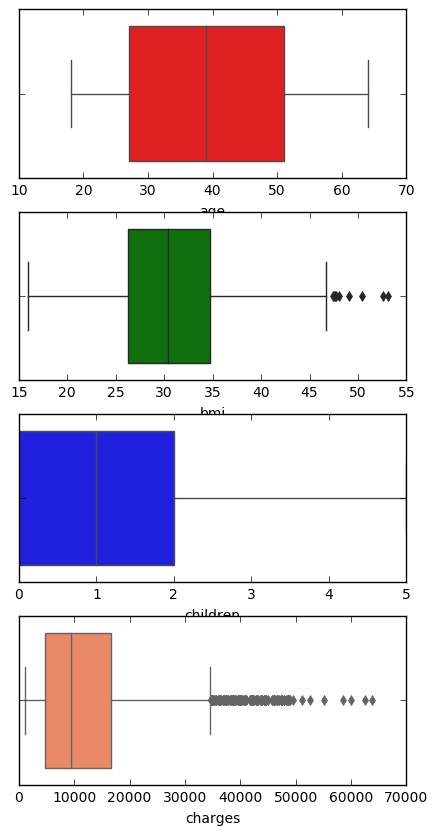

In [192]:
fig, axes = plt.subplots(nrows = 4, ncols = 1, figsize = (5,10))
sns.boxplot(data['age'], color ='r', ax = axes[0]);
sns.boxplot(data['bmi'], color = 'g', ax = axes[1]);
sns.boxplot(data['children'], color = 'b', ax = axes[2]);
sns.boxplot(data['charges'], color = 'coral', ax = axes[3]);
plt.show()


It seems the numerical variables are well spread out. 
- Age has no outliers.
- Children distribution is right skewed.
- Charges seems to have high outliers and the max value is very high compared to upper whisker 
- bmi also seems to have small amount of high out liers though they are not as high as in the case for charges


### Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


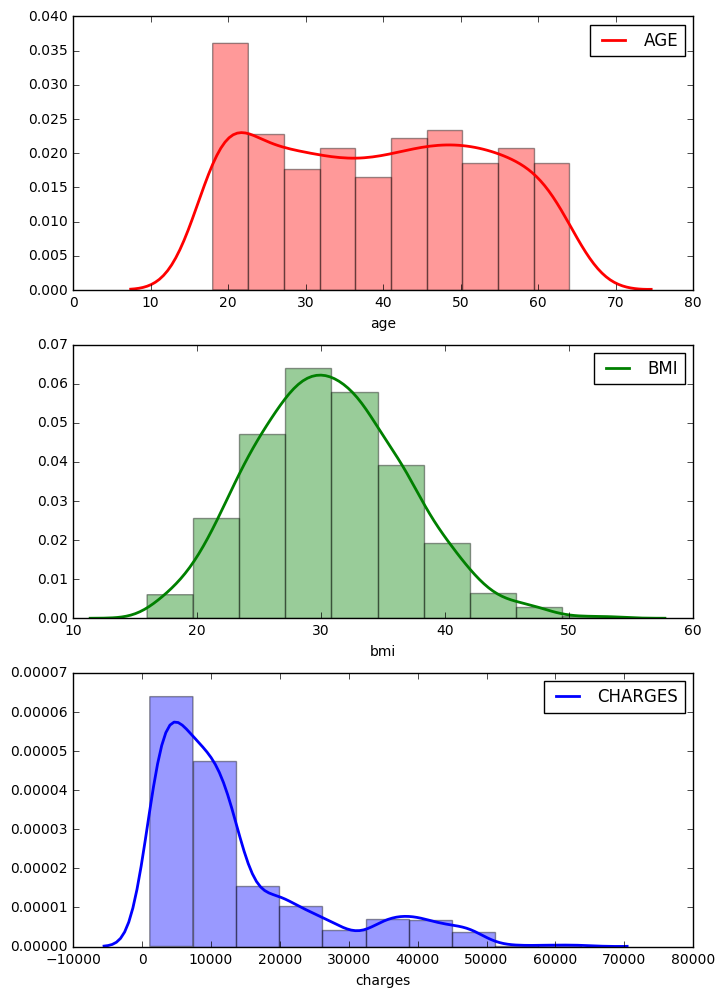

In [193]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (8,12))
sns.distplot(data['age'], bins = 10, color = 'r', ax = axes[0], kde_kws={"color":"r", "lw": 2, "label": "AGE"});
sns.distplot(data['bmi'], bins = 10, color = 'g', ax = axes[1], kde_kws={"color":"g", "lw": 2, "label": "BMI"});
sns.distplot(data['charges'], bins = 10, color = 'b', ax = axes[2], kde_kws={"color":"b", "lw": 2, "label": "CHARGES"});
plt.show()


- Maximum number of observation are for 18 'age'
- The 'bmi' distribution looks very normal with slight right tail (right skewed)
- 'charges' is highly right skewed with many high outliers and a long tail.



### Measure of skewness of ‘bmi’, ‘age’ and ‘charges’columns

In [194]:
print("Skewness of age column =", data.age.skew())
print("Skewness of bmi column =", data.bmi.skew())
print("Skewness of charges column =", data.charges.skew())

Skewness of age column = 0.055672515653
Skewness of bmi column = 0.284047110599
Skewness of charges column = 1.51587965802



- Age and BMI are nearly symmetrical datasets (age is more symmetrical than BMI as per skewness value)
- Age and BMI are not skewed but BMI is slightly right skewed as per skewness value of 0.28
- Charges is highly right skewed as skewness value is 1.51

### Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges' columns



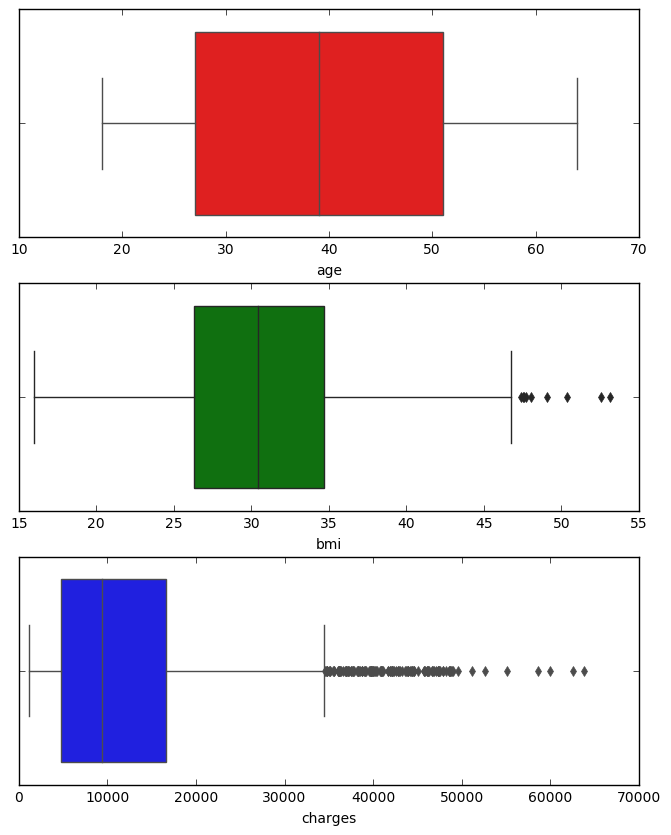

In [195]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (8,10))
sns.boxplot(data['age'], color ='r', ax = axes[0]);
sns.boxplot(data['bmi'], color = 'g', ax = axes[1]);
sns.boxplot(data['charges'], color = 'b', ax = axes[2]);
plt.show()

- Charges has many high outliers 
- BMI also has some high outliers
- Age has no outliers

### Distribution of categorical columns (include children)

1 - Count plot of different categorical variables which are 
- smoker (1-smoker; 0-non-smoker)
- sex
- number of children
- region

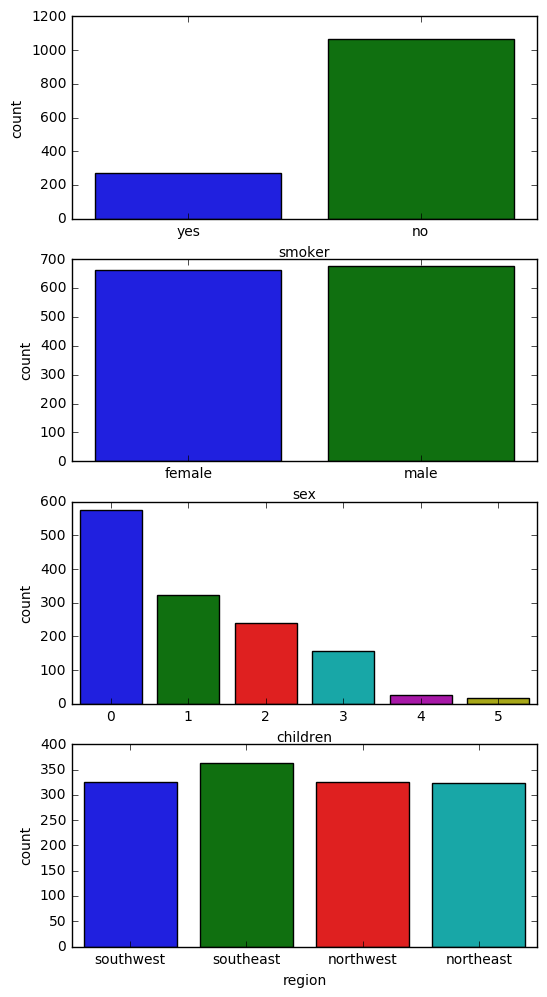

In [196]:
fig, axes = plt.subplots(nrows = 4, ncols = 1, figsize = (6,12))
sns.countplot(data['smoker'], ax = axes[0]);
sns.countplot(data['sex'], ax = axes[1]);
sns.countplot(data['children'], ax = axes[2]);
sns.countplot(data['region'], ax = axes[3])
plt.show()

- Number of smokers is less than number of non-smokers in this dataset 
- There are nearly equal number of males and females in the dataset
- Most observation in the datasets has no children, the number of people having higher children are less amd compared to lesser numner of children
- The data set consists of upto 5 children
- More data is from South East region as compared to the other regions
- Other regions have nearly same observation 


2 - How the categorical variables affect each other

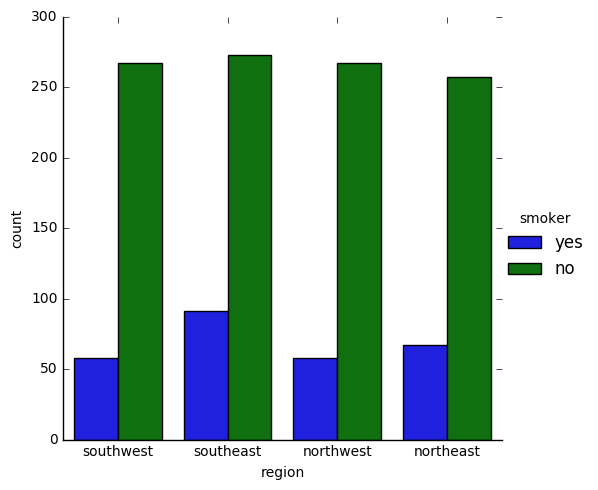

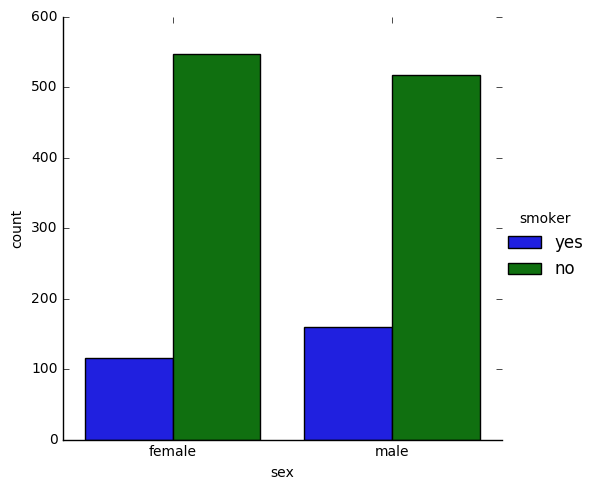

In [197]:
sns.catplot(x = 'region', data = data, kind = 'count',hue = 'smoker')
sns.catplot(x = 'sex', data = data, kind = 'count', hue = 'smoker')
plt.show()

- Although the number of observation from south east region is higher, it can be seen that the proportion of smokers in south east region is slightly higher than the other regions
- Male smokers proportion seems to be higher than female smoker proportion


### Pair plot that includes all the columns of the dataframe

- Since pair plot includes only numerical variables, label encoder is applied to smoker and region also to include them in the pair plot

In [198]:
label_encoder = preprocessing.LabelEncoder() 
data['smoker']= label_encoder.fit_transform(data['smoker']) 
data['region']= label_encoder.fit_transform(data['region']) 
data['sex']= label_encoder.fit_transform(data['sex'])

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


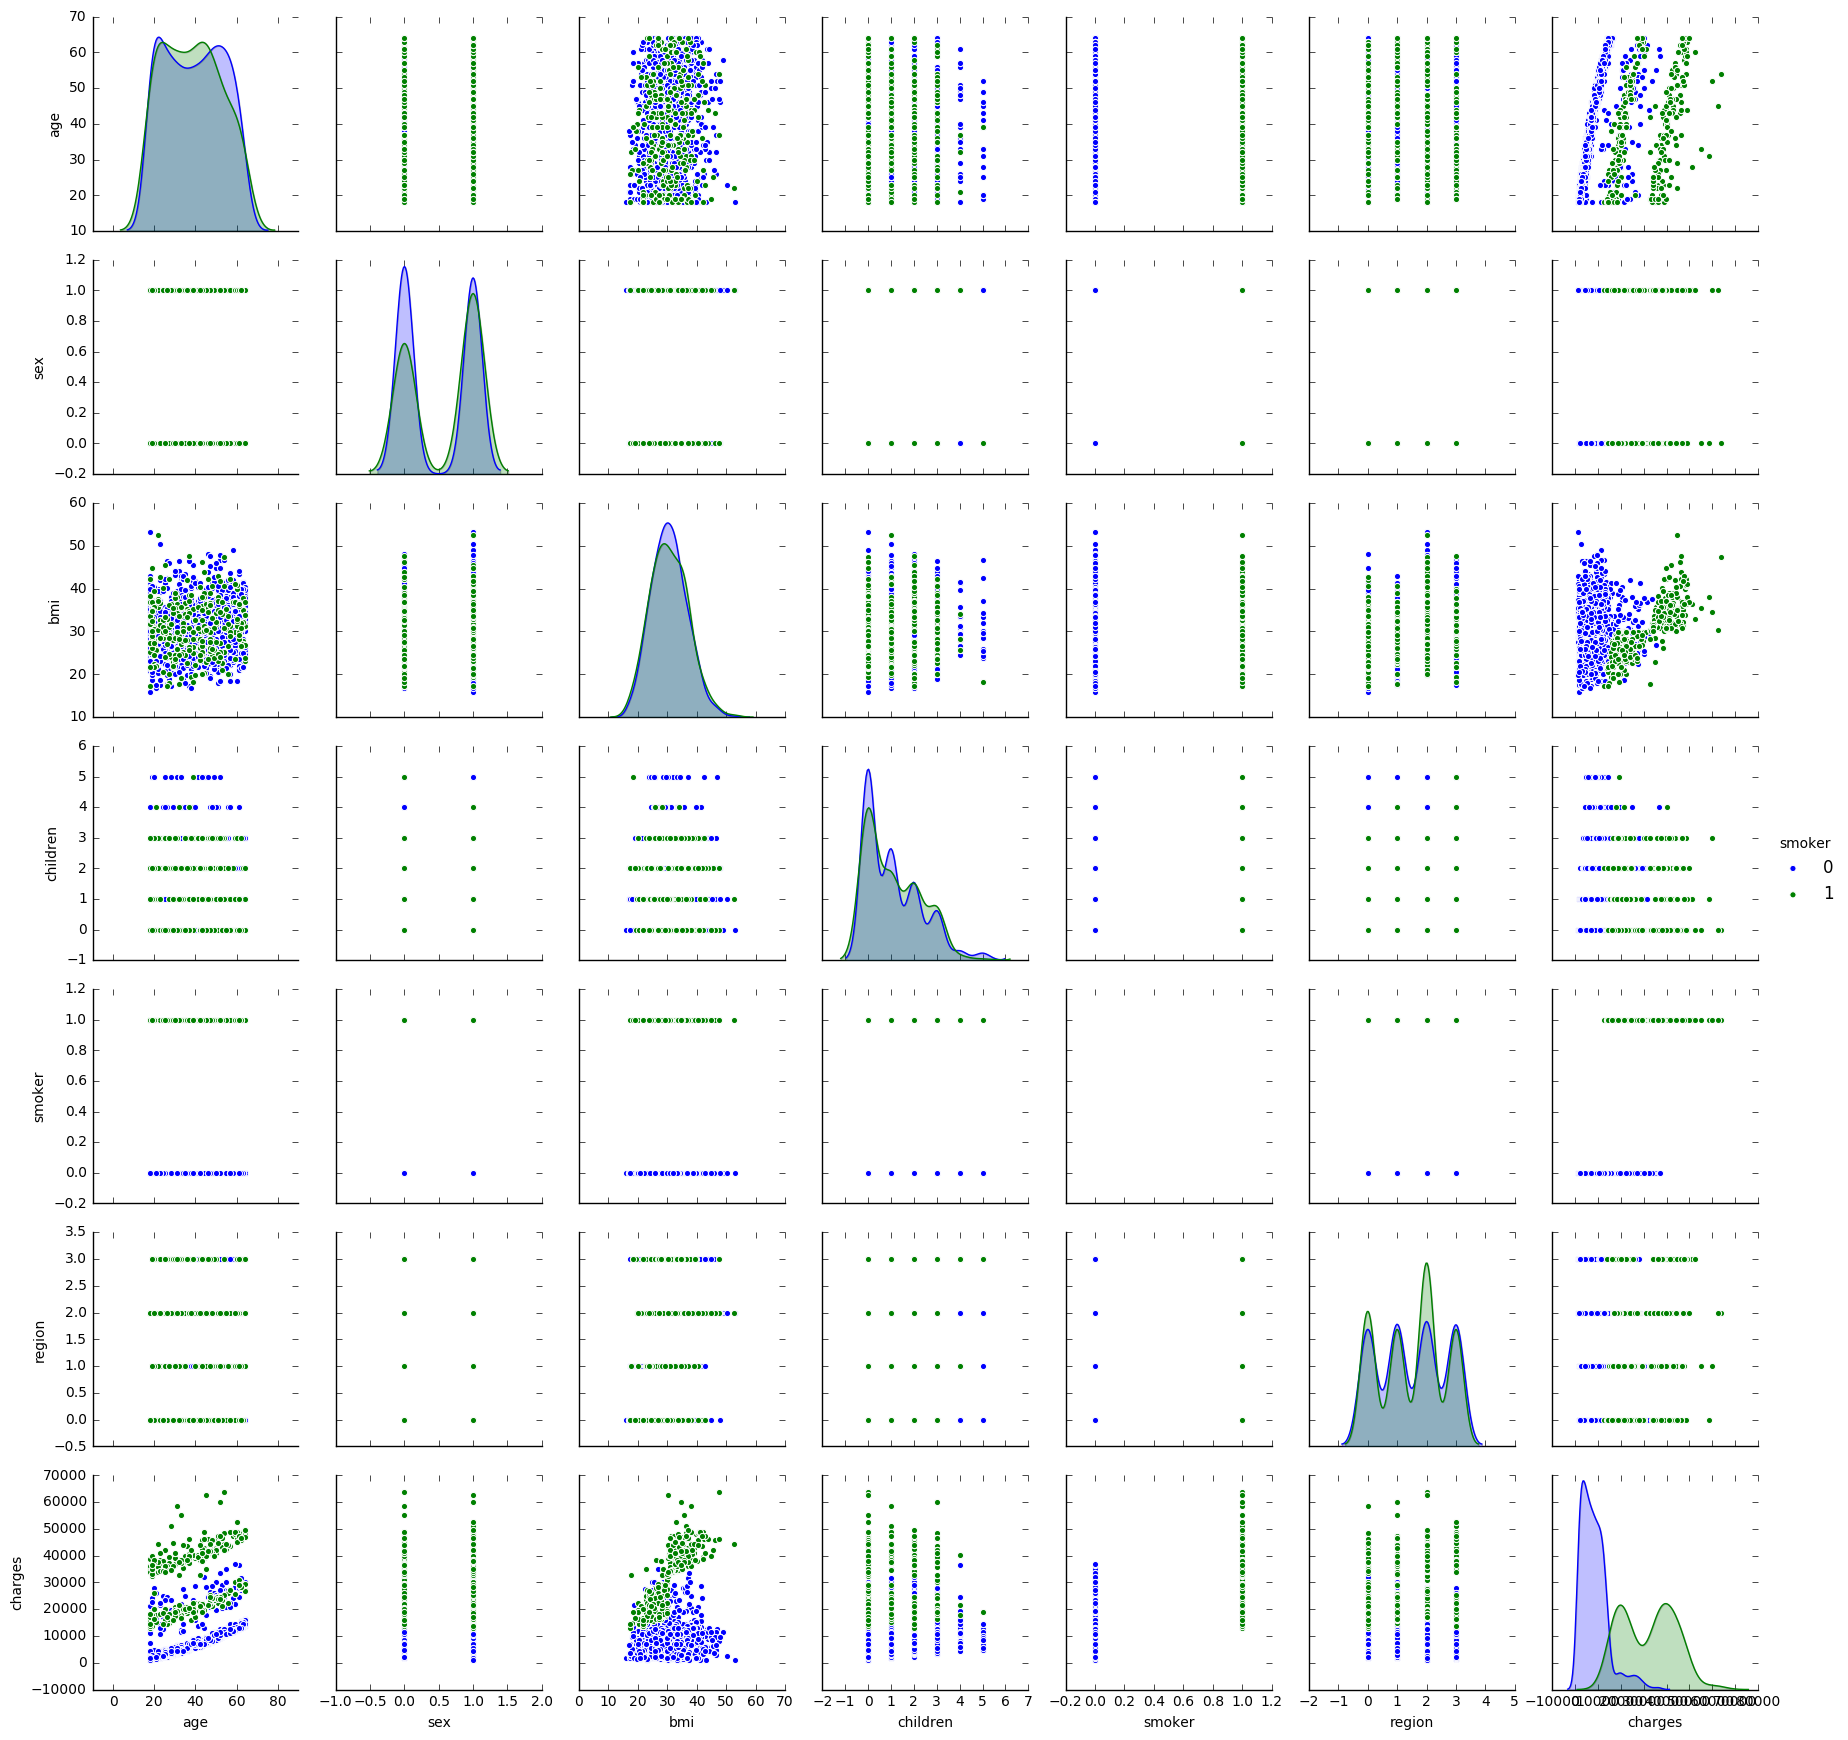

In [199]:
sns.pairplot(data, hue = 'smoker');
plt.show()

- Age and BMI are not correlated
- BMI distribution looks nearly normal distribution
- Smoking seems to have a very strong corelation with charges. 
- As age increases charges also increases for smoker and non smoker. Most of the non smoker pay less charges than smoker for given age.
- 4 primary peaks seen in 0, 1, 2, 3 children. Smaller 2 peaks seen at 4 and 5 children
- In region 3, percentage of smoker is higher whereas in other region percentage of smoker is same
- Every region seems to be very well distributed amoung the ages selected. 
- Region wise there is no difference in charges
- smoker pay more charges than non smoker for given bmi
- Charges for smoker distribution is a bi-modal distribution. some smoker pay less charges than others

## Do charges of people who smoke differ significantly from the people who don't?

#### Visual Analysis

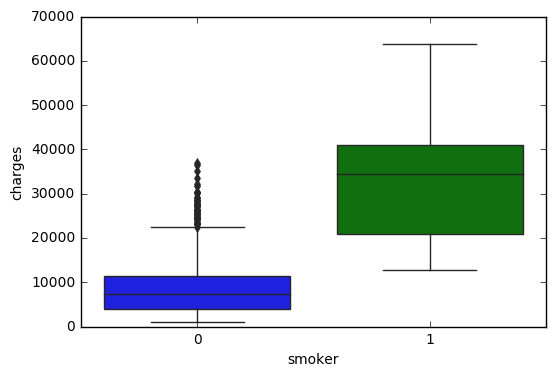

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


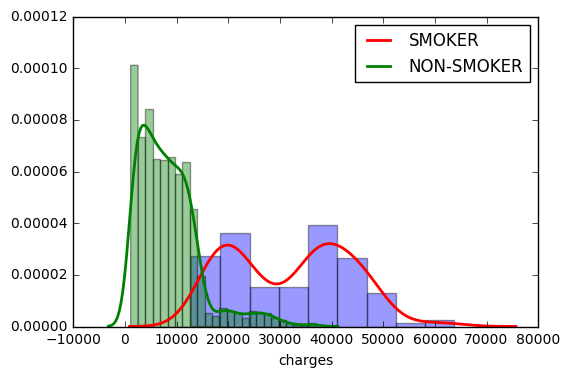

In [200]:

sns.boxplot(x="smoker", y="charges", data=data);
plt.show()
data_smoker = data[data['smoker'] == 1]
data_nonsmoker = data[data['smoker'] == 0]
sns.distplot(data_smoker.charges, kde_kws={"color":"r", "lw": 2, "label": "SMOKER"})
sns.distplot(data_nonsmoker.charges, kde_kws={"color":"g", "lw": 2, "label": "NON-SMOKER"})
plt.show()

- BOX PLOT: 
    - From the box plot it is seen that smokers have significantly higher charges than non-smokers 
    - Even the lower whisker of the box plot for smokers is more (charges) as compared to the 75 percentile value of the non-smoker data
    - It is also seen that the non-smoker (0), has a lot of high outliers. This suggests that there are some people who pay high charges although they do not smoke. 
    - Both distributions are right skewed

- DISTRIBUTION PLOT: - Non Smoker is a uni-modal distribution while smoker charges relation is bimodal
                     - This suggests that some smokers pay very high charges while some smokers pay lower charges.
                     - Lowest charges paid by smoker are more than charges paid non smoker

#### Hypothesis testing
We conduct an 2-sample indepndent t-test with 5% significance to test if the distribution of charges paid by smokers is actually statistically different from those paid by non-smokers
For this:
    
    - NULL HYPOTHESIS (H0): There is no difference between the charges paid by smokers and non-smokers
    - ALTERNATE HYPOTHESIS (H1): There is significant difference between the charges paid by smokers and non-smokers

In [201]:
t_statistic, p_value  =  stats.ttest_ind(data_smoker.charges, data_nonsmoker.charges)
print('P Value %1.2e' % (p_value*2)) # as it is two tail test, p value is multiplied by 2
print('T Statistic Value %1.2f' % t_statistic) 

P Value 1.65e-282
T Statistic Value 46.66


### Insights from Statistical Analysis regarding the charges paid by smokers and non-smokers
Since the p-value is found to be very very low (1.65e-282) and it is less than 0.05 (5% significance), we can REJECT the NULL Hypothesis (H0).<br>
This means that we can say with 95% statistical confidence that "There is significant difference between the charges paid by smokers and non-smokers"

### Does bmi of males differ significantly from that of females?

#### Visual Analysis

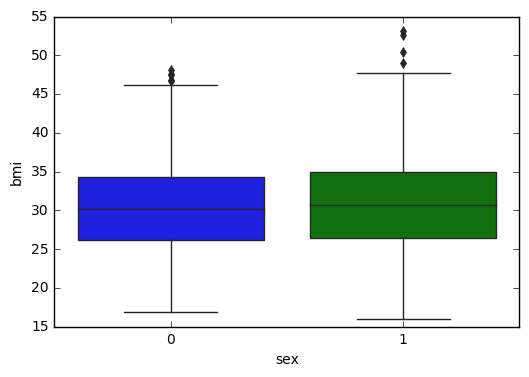

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


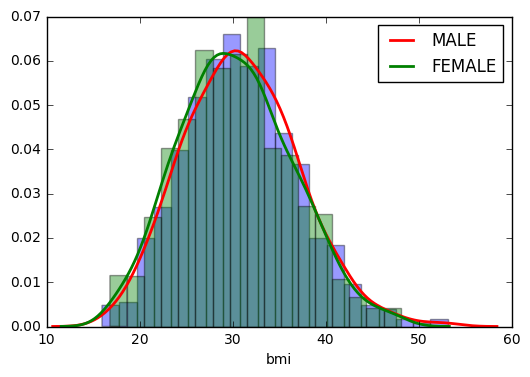

In [202]:
sns.boxplot(x="sex", y="bmi", data=data);
plt.show()
male = data[data['sex'] == 1]
female = data[data['sex'] == 0]
sns.distplot(male.bmi, kde_kws={"color":"r", "lw": 2, "label": "MALE"})
sns.distplot(female.bmi, kde_kws={"color":"g", "lw": 2, "label": "FEMALE"})
plt.show()


- From both the box and the distribution plots it is seen that not much can be concluded on if gender has an effect on BMI
- It is also seen that both the distributions are very close to normal distribution
- Males have a few higher value high outliers

#### Hypothesis testing using 2-sample independent t-test at 5% significance
We conduct an 2-sample indepndent t-test wiht 5% significance to test if the distribution of bmi of male and female in the dataset is actually statistically different. For this:
- NULL HYPOTHESIS (H0): There is no difference between the bmi of male and female
- ALTERNATE HYPOTHESIS (H1): There is significant difference between the bmi of male and female

In [203]:
t_statistic, p_value  =  stats.ttest_ind(female.bmi, male.bmi)
print('P Value %1.2f' % (p_value*2)) # as it is two tail test, p value is multiplied by 2
print('T Statistic Value %1.2f' % t_statistic) 

P Value 0.18
T Statistic Value -1.70


Since the p-value is 0.18 and it is more than 0.05 (5% significance), we FAIL TO REJECT the NULL Hypothesis (H0).
This means that we can say with 95% statistical confidence that "There is no significant difference between the bmi of male and female"


### Is the proportion of smokers significantly different in different genders?

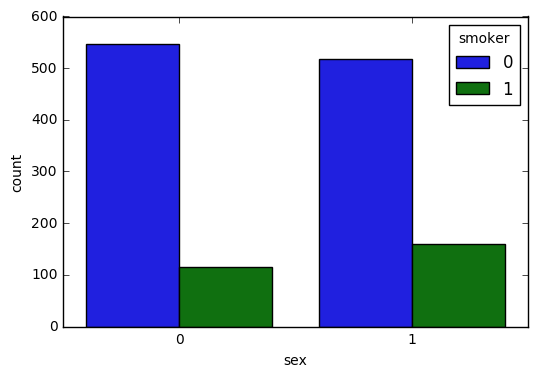

In [204]:
sns.countplot(x='sex', hue = 'smoker', data = data)
plt.show()


#### Insights from visual inspection
- We cannot conclude anything from visual inspection

#### Chi Square test

In [205]:
num_male, dummy = male.shape
num_male_smoker = male['smoker'].sum()
male_smoker_prop = (num_male_smoker/num_male)
print('Number of males in the dataset =', num_male)
print('Number of male smoker in the dataset =', num_male_smoker)
print("Male Smoker proportion =",male_smoker_prop)
num_female, dummy = female.shape
num_female_smoker = female['smoker'].sum()
female_smoker_prop = (num_female_smoker/num_female)
print('Number of females in the dataset =', num_female)
print('Number of female smoker in the dataset =', num_female_smoker)
print("Female Smoker proportion =", female_smoker_prop)


Number of males in the dataset = 676
Number of male smoker in the dataset = 159
Male Smoker proportion = 0.23520710059171598
Number of females in the dataset = 662
Number of female smoker in the dataset = 115
Female Smoker proportion = 0.17371601208459214


### Null Hypothesis: 
The proportions of male and female smokers do not vary significantly
### Alternate Hypothesis:
The proportions of male and female smokers vary significantly


Let us assume Null hypothesis is true. In that case the proportion of male and female smokers should be 0.5 and 0.5. <br>
male and female are distributed as ratio 676 males/662 females 



In [206]:
#calculating expected value for equal proportions
male_smoker_expected = (676/(676+662))*274
female_smoker_expected = (662/(676+662))*274
print('Male smokers expected for Null Hypothesis to be valid =', male_smoker_expected)
print('Female smokers expected for Null Hypothesis to be valid =', female_smoker_expected)
male_smoker_expected_prop = male_smoker_expected/num_male
female_smoker_expected_prop = female_smoker_expected/num_female
print("Expected male smoker proportion for Null Hypothesis to be valid = ",male_smoker_expected_prop)
print("Expected female smoker proportion for Null Hypothesis to be valid = ",female_smoker_expected_prop)

Male smokers expected for Null Hypothesis to be valid = 138.43348281016443
Female smokers expected for Null Hypothesis to be valid = 135.56651718983557
Expected male smoker proportion for Null Hypothesis to be valid =  0.2047832585949178
Expected female smoker proportion for Null Hypothesis to be valid =  0.20478325859491778


In [207]:
actual=[115,159]
expected =[135.56651718983557,138.43348281016443]
a,b=stats.chisquare(actual, expected)
print("The two sided p value for the chi sq  is = ", b*2)

The two sided p value for the chi sq  is =  0.0259049361101


#### Degrees of freedom for this case is (2-1)x(2-1) = 1

In [208]:
p_critical=stats.chi2.ppf(q = 0.975, df = 1) 
print("Critical value of chi square =", p_critical)
print("The two sided p value for the chi sq value is = ", (1 - stats.chi2.cdf(6.175590414376029, 1))*2)

Critical value of chi square = 5.02388618731
The two sided p value for the chi sq value is =  0.0259049361101


Now since the observed chi square value (6.175590414376029) is greater than the critical value (3.841458820694124), and the two sided p- value obtained (0.019) less than 0.05(5% significance) than we can REJECT THE NULL HYPOTHESIS.
Thus there is significant difference between the smokers in male and female

## Is the distribution of bmi across women with no children, one child and two children, the same ?

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


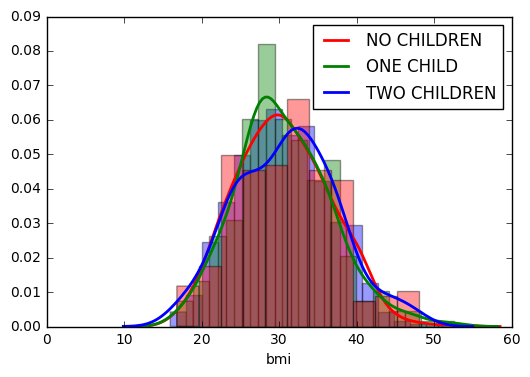

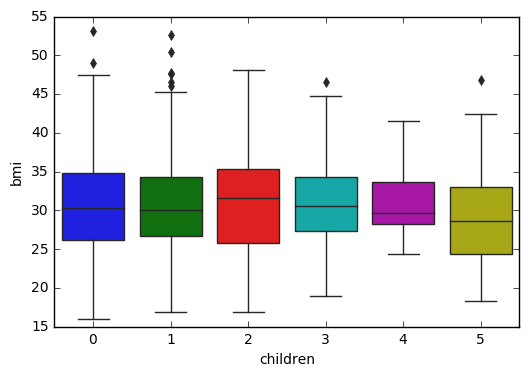

In [209]:
zero_chil_female = data[data['children'] == 0]
one_chil_female = data[data['children'] == 1]
two_chil_female = data[data['children'] == 2]
sns.distplot(zero_chil_female.bmi, kde_kws={"color":"r", "lw": 2, "label": "NO CHILDREN"})
sns.distplot(one_chil_female.bmi, kde_kws={"color":"g", "lw": 2, "label": "ONE CHILD"})
sns.distplot(two_chil_female.bmi, kde_kws={"color":"b", "lw": 2, "label": "TWO CHILDREN"})
plt.show()
sns.boxplot(x="children", y="bmi", data=data, linewidth=1);
plt.show()

We can't draw any conclusion from above graph

#### Statistical test 
- For this we use the ANOVA test. But before conducting ANOVA, test equality of variances (using Levene's test) is conducted. 
- The Levene test tests the null hypothesis that all input samples are from populations with equal variances.
                                                           
##### NULL HYPOTHESIS FOR LEVINE TEST
All input samples are from populations with equal variances
                                                           
##### ALTERNATE HYPOTHESIS FOR LEVINE TEST
The samples are drawn from populations with unequal variances

In [210]:
statistic, p_value  =  stats.levene(zero_chil_female.bmi, one_chil_female.bmi, two_chil_female.bmi)
print('P Value %1.2f' % p_value) 
print('T Statistic Value %1.2f' % t_statistic) 

P Value 0.33
T Statistic Value -1.70


##### Insights from LEVINE TEST
- It is seen that the p value (0.33) is greater than the required statistical significance value (0.05). Hence we FAIL TO REJECT THE NULL HYPOTHESiS
- The samples are drawn from populations of equal variances.ANOVA can be performed with this data set

#### ANOVA TEST
##### NULL HYPOTHESIS FOR ANOVA
- None of the samples (0 child, 1 child or 2 children) have different bmi as compared to the others

##### ALTERNATE HYPOTHESIS FOR ANOVA
- Atleast one of the samples (0 child, 1 child or 2 children) have different bmi as compared to the others

In [211]:
statistic, p_value  =  stats.f_oneway(zero_chil_female.bmi, one_chil_female.bmi, two_chil_female.bmi)
print('P Value %1.2f' % p_value) 
print('T Statistic Value %1.2f' % t_statistic) 

P Value 0.66
T Statistic Value -1.70


Since the p-value (0.66) obtained is greater than the level of significance for this case (5%), we FAIL TO REJECT NULL HYPOTHESIS
The distribution of bmi across women with no children, one child and two children is the same